# Advanced Machine Learning Technologies
# Laboratory work № 2
Performed by Petrov Alexander, j4134c

In [58]:
!pip install shap

In [59]:
!pip install eli5

In [60]:
!pip install lime

In [61]:
!pip install pdpbox==0.3.0

In [62]:
import shap
import eli5
import lime
from pdpbox import pdp
from pdpbox import info_plots
from eli5.sklearn import PermutationImportance
from lime import lime_tabular
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
import graphviz
from sklearn import metrics

In [63]:
file_path = 'diabetes.csv'
df = pd.read_csv(file_path, sep=',')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data preparation and model building

In [64]:
X = df.iloc[:, :-1]
# X_columns=list(X.columns)
# X = preprocessing.normalize(X)
# X_norm = pd.DataFrame(X, columns=X_columns)
Y = df.iloc[:, -1:]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, shuffle=False)
dt_model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_leaf_nodes=10, max_depth=10, random_state=1)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=10,
                       min_samples_leaf=10, random_state=1)

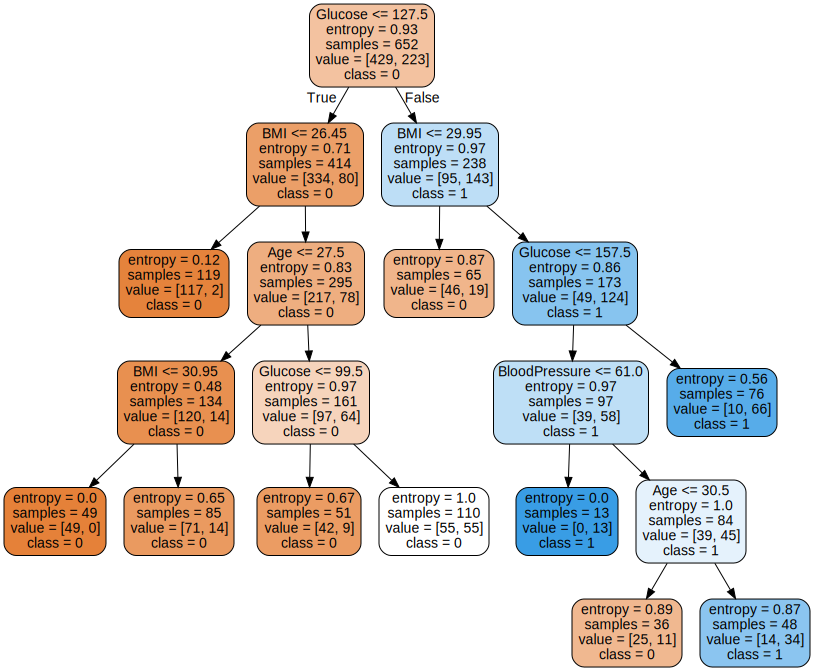

In [65]:
columns = list(x_train.columns)
export_graphviz(dt_model, out_file='tree.dot',
                feature_names=columns,
                class_names=['0', '1'],
                rounded=True, proportion=False,
                precision=2, filled=True, label='all')
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Quality metrics calculation

In [66]:
def metrics_caclucation(true_res, pred_res):
    accuracy = metrics.accuracy_score(true_res, pred_res)
    precision = metrics.precision_score(true_res, pred_res)
    f1_score = metrics.f1_score(true_res, pred_res, average='macro')
    # Print metrics
    print(
    f'Accuracy: {accuracy}',
    f'\nPrecision: {precision}',
    f'\nF1 Score: {round(f1_score, 2)}')

In [67]:
y_pred = dt_model.predict(x_test)
metrics_caclucation(y_test, y_pred)

Accuracy: 0.7672413793103449 
Precision: 0.8 
F1 Score: 0.73


# Shapley values calculation and plotting the graphs

In [68]:
f = lambda x: dt_model.predict_proba(x)[:,1]
med = x_train.median().values.reshape((1, x_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(x_test.iloc[0:100, :])

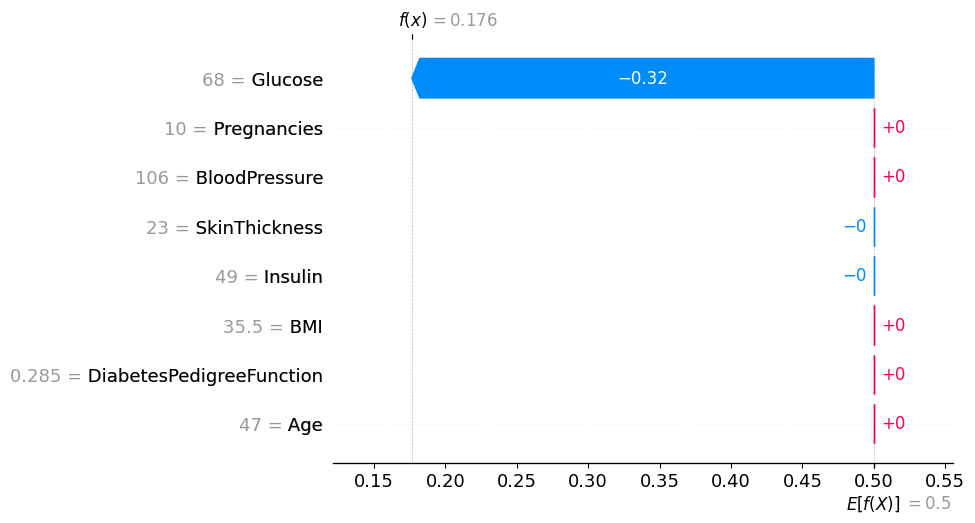

In [69]:
shap.plots.waterfall(shap_values[20])

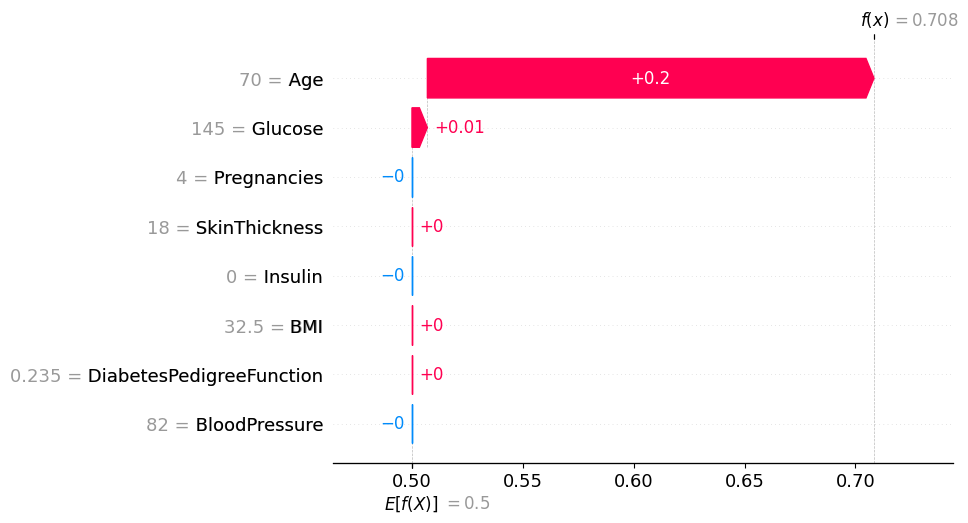

In [70]:
shap.plots.waterfall(shap_values[14])

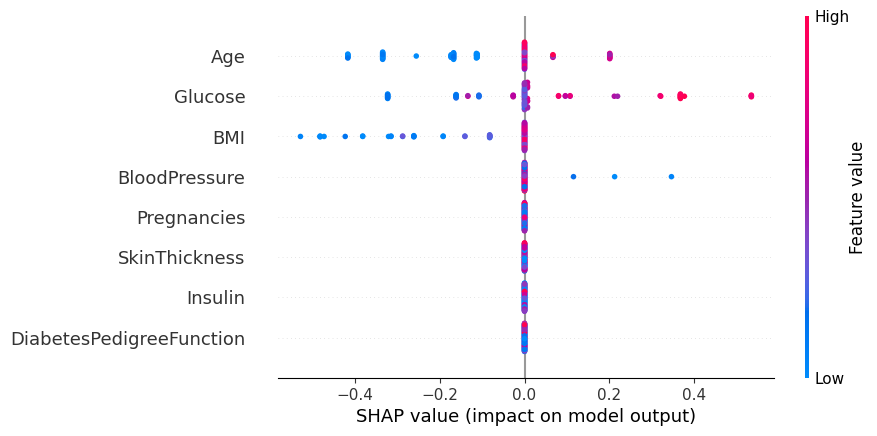

In [71]:
shap.plots.beeswarm(shap_values)

# Permutation Importance

In [72]:
perm = PermutationImportance(dt_model, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names=list(x_test.columns))

Weight,Feature
0.1741 ± 0.0601,Glucose
0.0500 ± 0.0399,BMI
0.0328 ± 0.0352,Age
0.0052 ± 0.0138,BloodPressure
0 ± 0.0000,DiabetesPedigreeFunction
0 ± 0.0000,Insulin
0 ± 0.0000,SkinThickness
0 ± 0.0000,Pregnancies


# LIME

In [73]:
x_train_np = np.array(x_train)
x_test_np = np.array(x_test)

In [74]:
lime_explainer = lime_tabular.LimeTabularExplainer(x_train_np, feature_names=list(x_train.columns))

In [75]:
f_lime = lambda x: dt_model.predict_proba(x)
i = 14
exp = lime_explainer.explain_instance(x_test_np[i], f_lime, num_features=8)
exp.show_in_notebook()

# Conclusion
Thus in the course of this lab work, we used several frameworks such as eli5, LIME snd SHAP to define the features importance while model training and target predictions. We used regular Decision Tree Model for binary classification. Using the mentioned above frameworks, we were able to identify and then visualize the features that have the biggest impact on model predictions.

As one can see from the graphs after SHAP, we can distinguish "Glucose", "Age" and "BMI" as the features which values affect a lot on model prediction. For example the high values of feature "Glucose" increases the probability to define the object to positive class.
Then after using eli5 for defining permutation importance and LIME we have confirmed the SHAP results.